# Tema: Limpeza de dados - Microdados Enem 


Esse trabalho utiliza os microdados do Exame Nacional do Ensino Médio (Enem)[1].

Fonte dos Dados INEP
> Link: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem



In [4]:
# Caminho das Funções no OS
import os 
import sys
sys.path.append(os.getcwd())

# Bancos de Dados
import sqlite3
import random

# Outros
from tqdm import tqdm #Barra de progresso
from math import sqrt

# Manipulação dos Dados
import pandas as pd
import numpy as np
from functions.data_manipulation import *
from functions.data_visualization import *

# set some options in pandas
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_info_columns', 200)
pd.set_option('display.max_info_rows', 200)
pd.set_option('display.max_rows', 200)
pd.set_option('display.width', 200)


# 1) Banco de Dados
- Primeiramente podemos criar um banco de dados com os dados do enem.
- Como iremos usar 2 bases de 2023 e 2024 vai ajudar para agrupar em um único dataframe
- Usando o SELECT podemos escolher as colunas do interesse do projeto
  

In [2]:
# Abrindo o Banco de dados.
db_name = 'enem'
db = sqlite3.connect(f'{db_name}.db')

In [ ]:
# Carregando os dados.

# 2022 a 2023 sep = ';'
# df_chunks = pd.read_csv('/home/manel/Project/Ciencia_de_Dados/Pos_Descomplica/Enem/dados/MICRODADOS_ENEM_2022.csv', encoding = "iso-8859-1", sep = ';', chunksize = 500000)
df_chunks = pd.read_csv('/home/manel/Project/Ciencia_de_Dados/Pos_Descomplica/Enem/dados/MICRODADOS_ENEM_2023.csv', encoding = "iso-8859-1", sep = ';', chunksize = 500000)

# 2015 sep = ','
#df_chunks = pd.read_csv('Enem\dados\MICRODADOS_ENEM_2015.csv', encoding = "iso-8859-1", sep = ',', chunksize = 500000)

for df in df_chunks:
    df.to_sql(
        name = 'enem_2022', # Define o nome da tabela a receber as informações (ou ser criada)
        #name = 'enem_2023', 
        index = False,         # Não escreve o índice do dataframe na tabela
        if_exists = 'append',  # Se a tabela já existir, adiciona as informações abaixo das existentes
        con = db               # Define em qual banco os dados serão inseridos
    )

In [3]:
pd.read_sql_query('select * from sqlite_master', db)

,type,name,tbl_name,rootpage,sql
0,table,enem_2022,enem_2022,2,"CREATE TABLE ""enem_2022"" (\n""NU_INSCRICAO"" INT..."
1,table,enem_2023,enem_2023,389776,"CREATE TABLE ""enem_2023"" (\n""NU_INSCRICAO"" INT..."


In [4]:
#Verificando tabelas 
query = """
    SELECT name 
    FROM sqlite_master
    WHERE type='table'
"""
name_tables = pd.read_sql_query(query, db)
name_tables

,name
0,enem_2022
1,enem_2023


In [5]:
pd.read_sql_query('select * from sqlite_master', db)

,type,name,tbl_name,rootpage,sql
0,table,enem_2022,enem_2022,2,"CREATE TABLE ""enem_2022"" (\n""NU_INSCRICAO"" INT..."
1,table,enem_2023,enem_2023,389776,"CREATE TABLE ""enem_2023"" (\n""NU_INSCRICAO"" INT..."


In [6]:
query = """
    SELECT * 
    FROM enem_2023
    LIMIT 5;
"""
enem_2023 = pd.read_sql_query(query, db)
enem_2023.head(2)
#enem_2023 = reduce_mem_usage(pd.read_sql_query(query,db))

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210059085136,2023,14,M,2,1,1,1,17,1,NaN,0,NaN,None,NaN,None,NaN,NaN,NaN,5300108,Brasília,53,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,0,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,F,E,D,5,F,C,C,D,C,D,C,B,B,D,C,C,B,B,A,B,B,A,A,B
1,210059527735,2023,12,M,2,1,0,1,16,1,NaN,0,NaN,None,NaN,None,NaN,NaN,NaN,5300108,Brasília,53,DF,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,0,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,E,E,B,3,H,A,B,C,C,A,B,B,B,A,B,A,B,B,A,A,C,A,D,B


In [7]:
# vamos ler apenas colunas específicas?
query = """
    SELECT NU_ANO, TP_SEXO, TP_ESTADO_CIVIL, TP_COR_RACA, TP_FAIXA_ETARIA,
           NO_MUNICIPIO_PROVA, SG_UF_PROVA,
           NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_LC, NU_NOTA_MT,
           NU_NOTA_REDACAO, IN_TREINEIRO,
           Q001, Q002, Q003, Q004, Q005, Q006, Q007, Q008,
           Q009, Q010, Q011, Q012, Q013, Q014, Q015, Q016, 
           Q017, Q018, Q019, Q020, Q021, Q022, Q023, Q024, Q025
    FROM enem_2022
"""

# enem_2022 = reduce_mem_usage(pd.read_sql_query(query,db))
enem_2022 = pd.read_sql_query(query,db)

In [8]:
# vamos ler apenas colunas específicas?
query = """
    SELECT NU_ANO, TP_SEXO, TP_ESTADO_CIVIL, TP_COR_RACA, TP_FAIXA_ETARIA,
           NO_MUNICIPIO_PROVA, SG_UF_PROVA,
           NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_LC, NU_NOTA_MT,
           NU_NOTA_REDACAO, IN_TREINEIRO,
           Q001, Q002, Q003, Q004, Q005, Q006, Q007, Q008,
           Q009, Q010, Q011, Q012, Q013, Q014, Q015, Q016, 
           Q017, Q018, Q019, Q020, Q021, Q022, Q023, Q024, Q025
    FROM enem_2023
"""

# enem_2023 = reduce_mem_usage(pd.read_sql_query(query,db))
enem_2023 = pd.read_sql_query(query,db)

In [9]:
print(enem_2022.shape)
print(enem_2023.shape)

(3476105, 38)
(3933955, 38)


# 2) Limpando os dados:
- Renomeando Colunas 
- Removendo quem é treineiro.
- Removendo quem zerou alguma prova.
- Removendo quem faltou alguma prova.
- Definindo uma coluna de média das provas.
- Removendo colunas não usadas (Com SQL podemos tirar antes)

In [10]:
anos = [enem_2023, enem_2022] 

# Define uma lista das provas que serão analisadas
provas = ['MATEMATICA','CIENCIAS_NATUREZA', 'LINGUAGENS', 'HUMANAS','REDACAO']

#'CO_UF_PROVA':'COD_UF',

for ano in anos:
    # renomeia as colunas do data frame
    cols = {
        'NU_INSCRICAO':'Inscricao',
        'NU_ANO':'Ano',
        'TP_SEXO':'Genero',
        'TP_ESTADO_CIVIL':'Estado_Civil',
        'TP_COR_RACA':'Cor',
        'TP_FAIXA_ETARIA':'Faixa_Etaria',
        'NO_MUNICIPIO_PROVA':'Município_Prova',
        'SG_UF_PROVA':'SG_UF',
        'NU_NOTA_CN':'Ciencias_Natureza',
        'NU_NOTA_CH':'Humanas',
        'NU_NOTA_LC':'Linguagem',
        'NU_NOTA_MT':'Matemática',
        'NU_NOTA_REDACAO':'Redação',
        'IN_TREINEIRO':'Treineiro',
        'Q001': 'Escolaridade_pai',
        'Q002': 'Escolaridade_mae',
        'Q003': 'Ocupacao_pai',
        'Q004': 'Ocupacao_mae',
        'Q005': 'Pessoas_residencia',
        'Q006': 'Renda_mensal_familiar',
        'Q007': 'Empregada_domestica',
        'Q008': 'Quantidade_banheiros',
        'Q009': 'Quantidade_quartos',
        'Q010': 'Quantidade_carros',
        'Q011': 'Quantidade_moto',
        'Q012': 'Geladeira',
        'Q013': 'Freezer',
        'Q014': 'Maquina_lavar',
        'Q015': 'Maquina_secar',
        'Q016': 'Microondas',
        'Q017': 'Lava_louca',
        'Q018': 'Aspirador_po',
        'Q019': 'TV',
        'Q020': 'DVD',
        'Q021': 'TV_assinatura',
        'Q022': 'Celular',
        'Q023': 'Telefone_fixo',
        'Q024': 'Computador',
        'Q025': 'Internet',
    }
    ano.rename(columns = cols, inplace = True)

In [11]:
enem_2023.head()

,Ano,Genero,Estado_Civil,Cor,Faixa_Etaria,Município_Prova,SG_UF,Ciencias_Natureza,Humanas,Linguagem,Matemática,Redação,Treineiro,Escolaridade_pai,Escolaridade_mae,Ocupacao_pai,Ocupacao_mae,Pessoas_residencia,Renda_mensal_familiar,Empregada_domestica,Quantidade_banheiros,Quantidade_quartos,Quantidade_carros,Quantidade_moto,Geladeira,Freezer,Maquina_lavar,Maquina_secar,Microondas,Lava_louca,Aspirador_po,TV,DVD,TV_assinatura,Celular,Telefone_fixo,Computador,Internet
0,2023,M,2,1,14,Brasília,DF,NaN,NaN,NaN,NaN,NaN,0,A,F,E,D,5,F,C,C,D,C,D,C,B,B,D,C,C,B,B,A,B,B,A,A,B
1,2023,M,2,1,12,Brasília,DF,NaN,NaN,NaN,NaN,NaN,0,F,E,E,B,3,H,A,B,C,C,A,B,B,B,A,B,A,B,B,A,A,C,A,D,B
2,2023,F,1,1,6,Caxias do Sul,RS,502.0,498.9,475.6,363.2,700.0,0,H,E,C,F,5,C,A,B,D,B,A,B,A,B,A,B,A,A,B,A,A,A,A,A,B
3,2023,F,1,3,2,Fortaleza,CE,459.0,508.5,507.2,466.7,880.0,0,D,D,B,B,5,C,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B
4,2023,F,1,3,3,Quixadá,CE,402.5,379.2,446.9,338.3,560.0,0,B,B,A,A,4,B,A,B,A,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A


In [12]:
# Removeremos quem é treineiro: 1 --> Sim; 0 --> Não
# Só iremos analisar aluno com notas. Eliminamos na.
# E Removeremos quem tirou nota 0 em alguma das provas

anos = [enem_2023, enem_2022] 
provas = ['Matemática','Ciencias_Natureza', 'Linguagem', 'Humanas','Redação']
for ano in anos:
    condicao = ano.loc[(ano['Treineiro']==1)].index
    ano.drop(condicao, inplace = True)
    ano.dropna(how = 'any', subset = provas, inplace = True)
    for prova in provas[:-1]:
        condicao = ano.loc[(ano[prova]==0)].index
        ano.drop(condicao, inplace = True)

In [13]:
print(enem_2023.shape)
print(enem_2022.shape)

(2152164, 38)
(1925479, 38)


In [14]:
df_23_22 = pd.concat([enem_2023, enem_2022])

In [15]:
print(df_23_22.shape)
df_23_22.head()

(4077643, 38)


,Ano,Genero,Estado_Civil,Cor,Faixa_Etaria,Município_Prova,SG_UF,Ciencias_Natureza,Humanas,Linguagem,Matemática,Redação,Treineiro,Escolaridade_pai,Escolaridade_mae,Ocupacao_pai,Ocupacao_mae,Pessoas_residencia,Renda_mensal_familiar,Empregada_domestica,Quantidade_banheiros,Quantidade_quartos,Quantidade_carros,Quantidade_moto,Geladeira,Freezer,Maquina_lavar,Maquina_secar,Microondas,Lava_louca,Aspirador_po,TV,DVD,TV_assinatura,Celular,Telefone_fixo,Computador,Internet
2,2023,F,1,1,6,Caxias do Sul,RS,502.0,498.9,475.6,363.2,700.0,0,H,E,C,F,5,C,A,B,D,B,A,B,A,B,A,B,A,A,B,A,A,A,A,A,B
3,2023,F,1,3,2,Fortaleza,CE,459.0,508.5,507.2,466.7,880.0,0,D,D,B,B,5,C,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B
4,2023,F,1,3,3,Quixadá,CE,402.5,379.2,446.9,338.3,560.0,0,B,B,A,A,4,B,A,B,A,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A
9,2023,M,1,1,11,Batatais,SP,564.7,630.3,610.4,680.2,600.0,0,H,E,F,D,2,F,A,B,C,B,B,B,B,B,A,B,A,B,C,B,A,C,A,B,B
10,2023,M,1,3,8,Natal,RN,644.9,620.2,626.9,736.3,860.0,0,F,C,D,B,4,B,A,C,C,A,A,B,A,B,A,B,A,B,B,A,A,E,A,B,B


In [16]:
# Define coluna de médias
df_23_22['Media'] = df_23_22[provas].mean(axis = 1)

In [17]:
df_23_22.head()

,Ano,Genero,Estado_Civil,Cor,Faixa_Etaria,Município_Prova,SG_UF,Ciencias_Natureza,Humanas,Linguagem,Matemática,Redação,Treineiro,Escolaridade_pai,Escolaridade_mae,Ocupacao_pai,Ocupacao_mae,Pessoas_residencia,Renda_mensal_familiar,Empregada_domestica,Quantidade_banheiros,Quantidade_quartos,Quantidade_carros,Quantidade_moto,Geladeira,Freezer,Maquina_lavar,Maquina_secar,Microondas,Lava_louca,Aspirador_po,TV,DVD,TV_assinatura,Celular,Telefone_fixo,Computador,Internet,Media
2,2023,F,1,1,6,Caxias do Sul,RS,502.0,498.9,475.6,363.2,700.0,0,H,E,C,F,5,C,A,B,D,B,A,B,A,B,A,B,A,A,B,A,A,A,A,A,B,507.94
3,2023,F,1,3,2,Fortaleza,CE,459.0,508.5,507.2,466.7,880.0,0,D,D,B,B,5,C,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,564.28
4,2023,F,1,3,3,Quixadá,CE,402.5,379.2,446.9,338.3,560.0,0,B,B,A,A,4,B,A,B,A,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,425.38
9,2023,M,1,1,11,Batatais,SP,564.7,630.3,610.4,680.2,600.0,0,H,E,F,D,2,F,A,B,C,B,B,B,B,B,A,B,A,B,C,B,A,C,A,B,B,617.12
10,2023,M,1,3,8,Natal,RN,644.9,620.2,626.9,736.3,860.0,0,F,C,D,B,4,B,A,C,C,A,A,B,A,B,A,B,A,B,B,A,A,E,A,B,B,697.66


In [18]:
# Exportar para .csv. Sem o index, index=False; 
# df_23_22.to_csv('df_23_22_01.csv', index=False, encoding = "utf-8")

In [5]:
# Carregando os dados
# df_23_22 = reduce_mem_usage(pd.read_csv('df_23_22_new.csv', encoding = "utf-8", sep = ','))
df_23_22 = pd.read_csv('df_23_22_01.csv', encoding = "utf-8", sep = ',')

In [19]:
df_23_22.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4077643 entries, 2 to 3476102
Data columns (total 39 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Ano                    int64  
 1   Genero                 object 
 2   Estado_Civil           int64  
 3   Cor                    int64  
 4   Faixa_Etaria           int64  
 5   Município_Prova        object 
 6   SG_UF                  object 
 7   Ciencias_Natureza      float64
 8   Humanas                float64
 9   Linguagem              float64
 10  Matemática             float64
 11  Redação                float64
 12  Treineiro              int64  
 13  Escolaridade_pai       object 
 14  Escolaridade_mae       object 
 15  Ocupacao_pai           object 
 16  Ocupacao_mae           object 
 17  Pessoas_residencia     int64  
 18  Renda_mensal_familiar  object 
 19  Empregada_domestica    object 
 20  Quantidade_banheiros   object 
 21  Quantidade_quartos     object 
 22  Quantidade_carros      

In [ ]:
# df_23_22.describe()

In [20]:
# Como identificar null em colunas
# Mostra o percentual de dados ausentes por coluna
((df_23_22.isnull().sum() / df_23_22.shape[0]) * 100).sort_values(ascending = False)

Ano                      0.0
Lava_louca               0.0
Quantidade_carros        0.0
Quantidade_moto          0.0
Geladeira                0.0
Freezer                  0.0
Maquina_lavar            0.0
Maquina_secar            0.0
Microondas               0.0
Aspirador_po             0.0
Quantidade_banheiros     0.0
TV                       0.0
DVD                      0.0
TV_assinatura            0.0
Celular                  0.0
Telefone_fixo            0.0
Computador               0.0
Internet                 0.0
Quantidade_quartos       0.0
Empregada_domestica      0.0
Genero                   0.0
Linguagem                0.0
Estado_Civil             0.0
Cor                      0.0
Faixa_Etaria             0.0
Município_Prova          0.0
SG_UF                    0.0
Ciencias_Natureza        0.0
Humanas                  0.0
Matemática               0.0
Renda_mensal_familiar    0.0
Redação                  0.0
Treineiro                0.0
Escolaridade_pai         0.0
Escolaridade_m

In [21]:
df_23_22.describe().T

,count,mean,std,min,25%,50%,75%,max
Ano,4077643.0,2022.527796,0.499227,2022.00,2022.00,2023.00,2023.00,2023.00
Estado_Civil,4077643.0,1.037394,0.372236,0.00,1.00,1.00,1.00,4.00
Cor,4077643.0,2.030834,1.008202,0.00,1.00,2.00,3.00,5.00
Faixa_Etaria,4077643.0,4.949272,3.474671,1.00,3.00,3.00,6.00,20.00
Ciencias_Natureza,4077643.0,498.713959,76.996719,313.60,441.20,490.80,549.50,875.30
Humanas,4077643.0,529.436389,82.972670,293.20,475.60,533.20,587.50,839.20
Linguagem,4077643.0,520.588165,75.340468,269.90,472.30,526.00,574.10,820.80
Matemática,4077643.0,538.584966,122.137715,319.80,438.80,525.00,625.50,985.70
Redação,4077643.0,627.435310,205.911991,0.00,520.00,620.00,780.00,1000.00
Treineiro,4077643.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00


- Como não teve zero Null não foi necessário substituir.
- No começo escolhemos só algumas colunas necessárias para nosso objetivo.
- E com alguns tratamento os nulos sumiram não sendo necessário usar esse código abaixo.
- Mas em determinadas situações é bem interessante usar.
- Dependo do modelo que irá usar de aprendisado de máquina e qual o seu objetivo

In [ ]:
# substitui notas missing por zero
for coluna in lista_targets:
    df_23_22[coluna] = df_23_22[coluna].fillna(0)
    
# Lebel Encoder
for coluna in lista_vars_explicativas:
    try:
        # substitui valores missings por um valor negativo arbitrário (para o modelo tentar capturar)
        df_23_22[coluna] = df_23_22[coluna].astype(float).replace(np.nan, -99999)
    except:
        # substitui valores missings por um valor categórico arbitrário (para o modelo tentar capturar)
        df_23_22[coluna] = df_23_22[coluna].astype(str).fillna("missing").replace("nan", "missing")
        # labelencoder
        labelencoder = LabelEncoder()
        labelencoder.fit_transform(list(set(df_23_22[coluna].unique().tolist())))
        df_23_22[coluna] = labelencoder.transform(df_23_22[coluna])

Se quiser tirar uma amostra

In [ ]:
#path = '/home/manel/Project/Ciencia_de_Dados/Pos_Descomplica/Enem/df_23_22_01.csv.'
path = '/home/manel/Project/Ciencia_de_Dados/Pos_Descomplica/Enem/df_23_22_01.csv'
with open(path, encoding="utf-8") as f:
#with open(path, encoding="latin-1") as f:
    row_count = sum(1 for row in f) - 1
row_count

In [ ]:
# Definindo percentual a se amostrar do DataFrame
percentual_sample_size = 0.20  # 20%

# Calculando número de linhas correspondentes ao percentual
sample_size = int(percentual_sample_size * row_count)

# Calculando numero de linhas a serem desprezadas
drop_size = row_count - sample_size

# Gerando array com numeros aleatórios de 1 a row_count (indices das linhas)
# com tamanho drop_size.
# Importante perceber que os numeros aleatórios não podem se repetir, por isso
# utilizamos a função random.sample() ou seja sem reposisão
drop_idx = random.sample(range(1, row_count), drop_size)

df_23_22 = pd.read_csv(
    path, 
    sep=',',
    #sep=';',
    encoding='utf-8', 
    #encoding='latin-1',
    skiprows = drop_idx 
)

In [22]:
print(df_23_22.shape)
df_23_22.head()

(4077643, 39)


,Ano,Genero,Estado_Civil,Cor,Faixa_Etaria,Município_Prova,SG_UF,Ciencias_Natureza,Humanas,Linguagem,Matemática,Redação,Treineiro,Escolaridade_pai,Escolaridade_mae,Ocupacao_pai,Ocupacao_mae,Pessoas_residencia,Renda_mensal_familiar,Empregada_domestica,Quantidade_banheiros,Quantidade_quartos,Quantidade_carros,Quantidade_moto,Geladeira,Freezer,Maquina_lavar,Maquina_secar,Microondas,Lava_louca,Aspirador_po,TV,DVD,TV_assinatura,Celular,Telefone_fixo,Computador,Internet,Media
2,2023,F,1,1,6,Caxias do Sul,RS,502.0,498.9,475.6,363.2,700.0,0,H,E,C,F,5,C,A,B,D,B,A,B,A,B,A,B,A,A,B,A,A,A,A,A,B,507.94
3,2023,F,1,3,2,Fortaleza,CE,459.0,508.5,507.2,466.7,880.0,0,D,D,B,B,5,C,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,564.28
4,2023,F,1,3,3,Quixadá,CE,402.5,379.2,446.9,338.3,560.0,0,B,B,A,A,4,B,A,B,A,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,425.38
9,2023,M,1,1,11,Batatais,SP,564.7,630.3,610.4,680.2,600.0,0,H,E,F,D,2,F,A,B,C,B,B,B,B,B,A,B,A,B,C,B,A,C,A,B,B,617.12
10,2023,M,1,3,8,Natal,RN,644.9,620.2,626.9,736.3,860.0,0,F,C,D,B,4,B,A,C,C,A,A,B,A,B,A,B,A,B,B,A,A,E,A,B,B,697.66


In [6]:
duplicados = df_23_22.duplicated()
print(duplicados.sum())
print(df_23_22.shape)

0
(4077643, 39)


In [ ]:
# O parâmetro subset nos da a liberdade de procurar duplicatas apenas em um conjunto de colunas
df_23_22.drop_duplicates()
df_23_22 = df_23_22.drop_duplicates(subset='Coluna', keep='first')
# podemos ter keep=last (mantém a última linha) ou keep = False (não mantém nenhuma)

In [7]:
# Restrição Espacial - Selecionado Local da Prova Estado de SP
# Lista UF
UF = ['RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL',
      'SE', 'BA', 'MG', 'ES', 'RJ', 'PR', 'SC', 'RS', 'MS', 'MT', 'GO', 'DF']

print(df_23_22.shape)

for uf in UF:
    condicao = df_23_22.loc[(df_23_22['SG_UF'] == uf)].index
    df_23_22.drop(condicao, inplace = True)

print(df_23_22.shape)
df_23_22.head()

(4077643, 39)
(630449, 39)


,Ano,Genero,Estado_Civil,Cor,Faixa_Etaria,Município_Prova,SG_UF,Ciencias_Natureza,Humanas,Linguagem,Matemática,Redação,Treineiro,Escolaridade_pai,Escolaridade_mae,Ocupacao_pai,Ocupacao_mae,Pessoas_residencia,Renda_mensal_familiar,Empregada_domestica,Quantidade_banheiros,Quantidade_quartos,Quantidade_carros,Quantidade_moto,Geladeira,Freezer,Maquina_lavar,Maquina_secar,Microondas,Lava_louca,Aspirador_po,TV,DVD,TV_assinatura,Celular,Telefone_fixo,Computador,Internet,Media
3,2023,M,1,1,11,Batatais,SP,564.7,630.3,610.4,680.2,600.0,0,H,E,F,D,2,F,A,B,C,B,B,B,B,B,A,B,A,B,C,B,A,C,A,B,B,617.12
6,2023,F,1,1,3,São Paulo,SP,626.5,604.9,614.3,548.8,800.0,0,E,E,B,B,3,C,A,B,C,B,A,B,B,B,A,B,A,A,B,A,A,C,A,B,B,638.90
23,2023,M,1,1,3,São Paulo,SP,523.8,576.3,596.5,628.1,600.0,0,C,C,C,B,2,D,A,B,B,A,A,B,A,B,A,A,A,A,B,A,A,B,A,A,B,584.94
43,2023,M,1,3,7,São Paulo,SP,507.0,575.8,596.4,579.6,720.0,0,D,E,C,B,5,C,A,C,D,A,A,C,A,B,A,C,A,A,C,A,A,E,A,B,B,595.76
45,2023,M,1,3,5,São Paulo,SP,601.5,645.0,603.4,645.0,800.0,0,C,C,C,B,3,G,A,B,C,A,A,B,A,B,A,B,A,B,D,A,A,D,A,B,B,658.98


In [8]:
df_23_22.reset_index(drop=True, inplace=True)

In [9]:
print(df_23_22.shape)
df_23_22.head()

(630449, 39)


,Ano,Genero,Estado_Civil,Cor,Faixa_Etaria,Município_Prova,SG_UF,Ciencias_Natureza,Humanas,Linguagem,Matemática,Redação,Treineiro,Escolaridade_pai,Escolaridade_mae,Ocupacao_pai,Ocupacao_mae,Pessoas_residencia,Renda_mensal_familiar,Empregada_domestica,Quantidade_banheiros,Quantidade_quartos,Quantidade_carros,Quantidade_moto,Geladeira,Freezer,Maquina_lavar,Maquina_secar,Microondas,Lava_louca,Aspirador_po,TV,DVD,TV_assinatura,Celular,Telefone_fixo,Computador,Internet,Media
0,2023,M,1,1,11,Batatais,SP,564.7,630.3,610.4,680.2,600.0,0,H,E,F,D,2,F,A,B,C,B,B,B,B,B,A,B,A,B,C,B,A,C,A,B,B,617.12
1,2023,F,1,1,3,São Paulo,SP,626.5,604.9,614.3,548.8,800.0,0,E,E,B,B,3,C,A,B,C,B,A,B,B,B,A,B,A,A,B,A,A,C,A,B,B,638.90
2,2023,M,1,1,3,São Paulo,SP,523.8,576.3,596.5,628.1,600.0,0,C,C,C,B,2,D,A,B,B,A,A,B,A,B,A,A,A,A,B,A,A,B,A,A,B,584.94
3,2023,M,1,3,7,São Paulo,SP,507.0,575.8,596.4,579.6,720.0,0,D,E,C,B,5,C,A,C,D,A,A,C,A,B,A,C,A,A,C,A,A,E,A,B,B,595.76
4,2023,M,1,3,5,São Paulo,SP,601.5,645.0,603.4,645.0,800.0,0,C,C,C,B,3,G,A,B,C,A,A,B,A,B,A,B,A,B,D,A,A,D,A,B,B,658.98


In [10]:
# Exportar para .csv. Sem o index, index=False; 
df_23_22.to_csv('df_23_22_01_SP.csv', index=False, encoding = "utf-8")

In [ ]:
# Carregando os dados
# df_23_22 = reduce_mem_usage(pd.read_csv('df_23_22_new.csv', encoding = "utf-8", sep = ','))
df_23_22_SP = pd.read_csv('df_23_22_01.csv', encoding = "utf-8", sep = ',')

/home/manel/Project/Ciencia_de_Dados/Pos_Descomplica/Enem/functions/data_visualization.py:247: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels = municipios.index,rotation = 90);


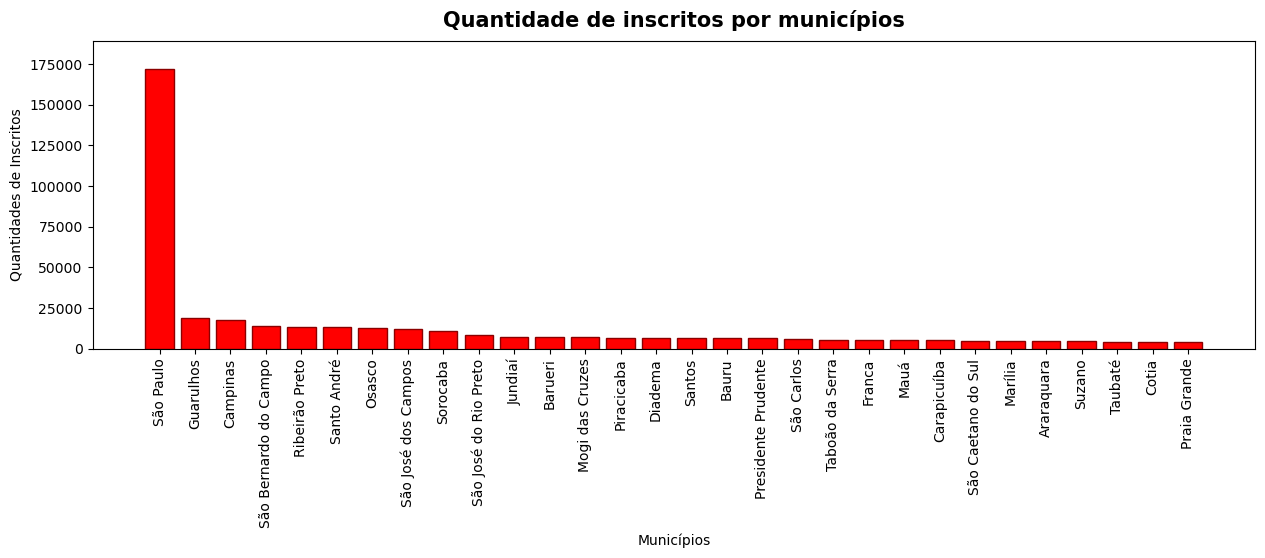

In [11]:
# Quantidade de Inscritos por municípios
quant_insc_muni(df_23_22)